# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_excel(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\8_flightPrice\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
dfr=pd.DataFrame(df["Price"])

In [4]:
df.shape

(10683, 11)

In [5]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As There are not much null blocks so we will drop those rows

In [7]:
df.dropna(inplace=True)

Removed All the Null Valued rows

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
objList = df.select_dtypes(include = "object").columns

In [10]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

# EDA

## Analysing The MAXIMUMS And MINIMUMS

In [11]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,23.733758,1.952256,1.436154,74.820165,107.983898,869.846564,194.072177,1.458248,7.392998,9087.214567
std,2.352090,12.337569,1.177276,1.474845,36.729039,61.087537,331.519717,108.625225,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


## Finding Any Highly Correlated values

In [12]:
corr_matrix = df.corr().abs()# Create correlation matrix

In [13]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix

In [14]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]# Find features with correlation greater than 0.95

In [15]:
to_drop

[]

Nothing To drop

## Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## Distplot

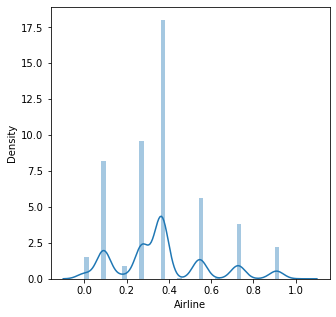

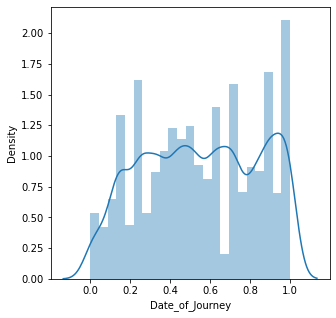

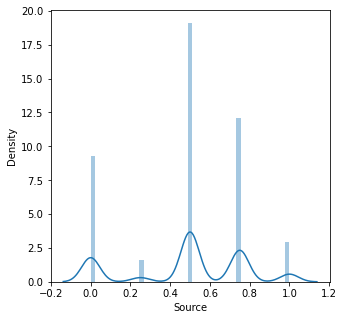

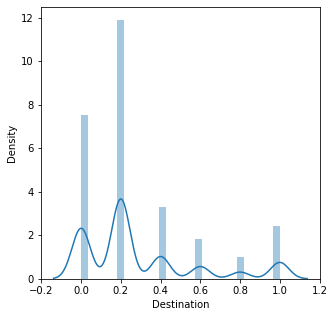

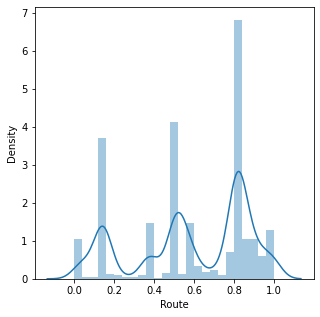

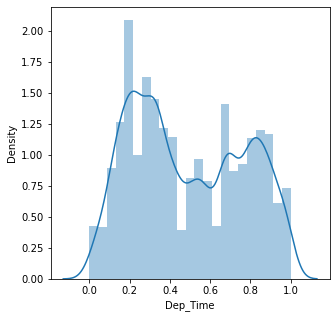

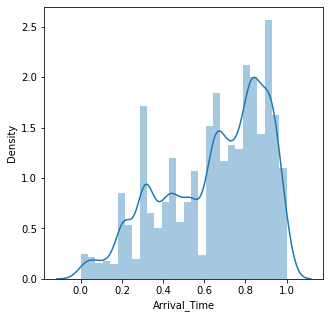

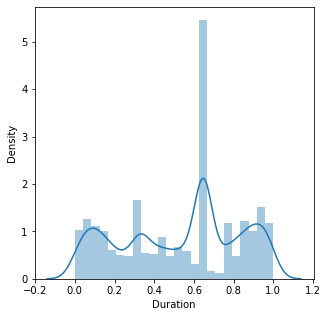

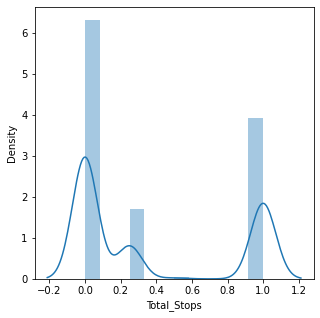

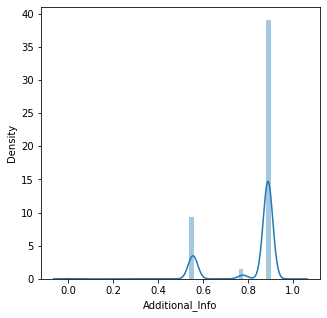

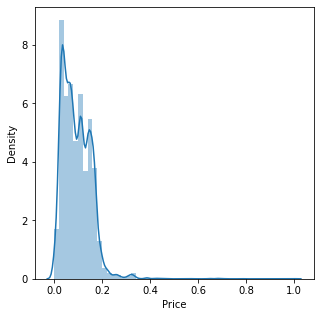

In [17]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Some Of The Columns Have Skewness

## Boxplot

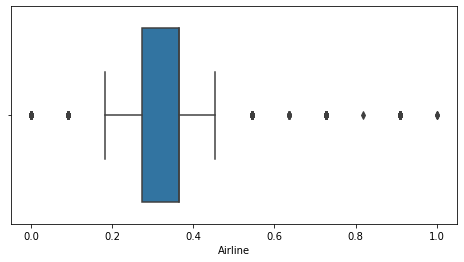

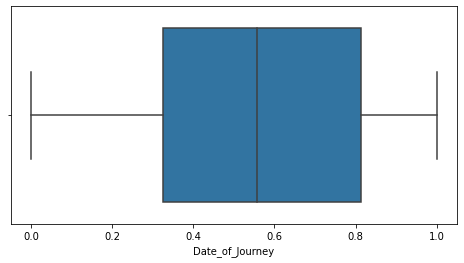

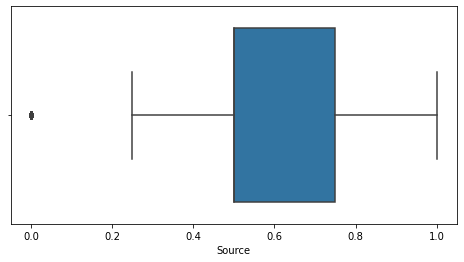

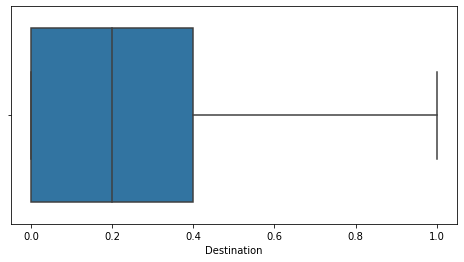

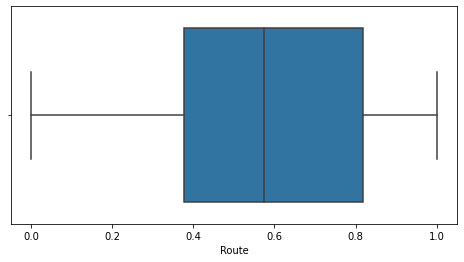

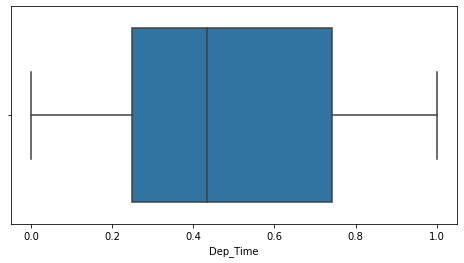

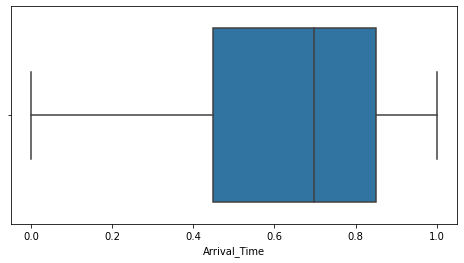

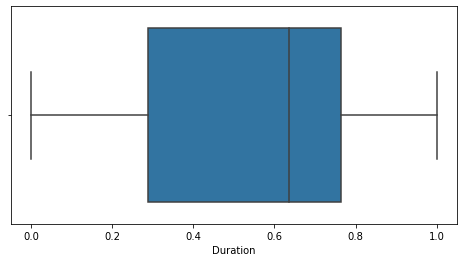

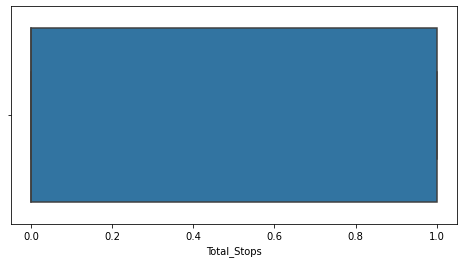

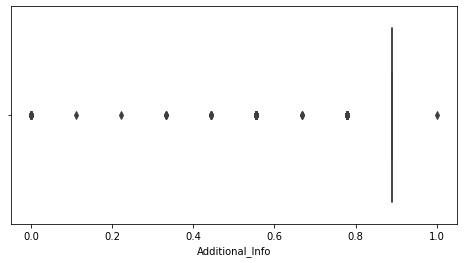

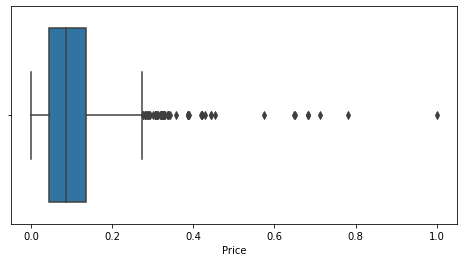

In [18]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

Some columns have a high amount of outliers in them

## Pairplot

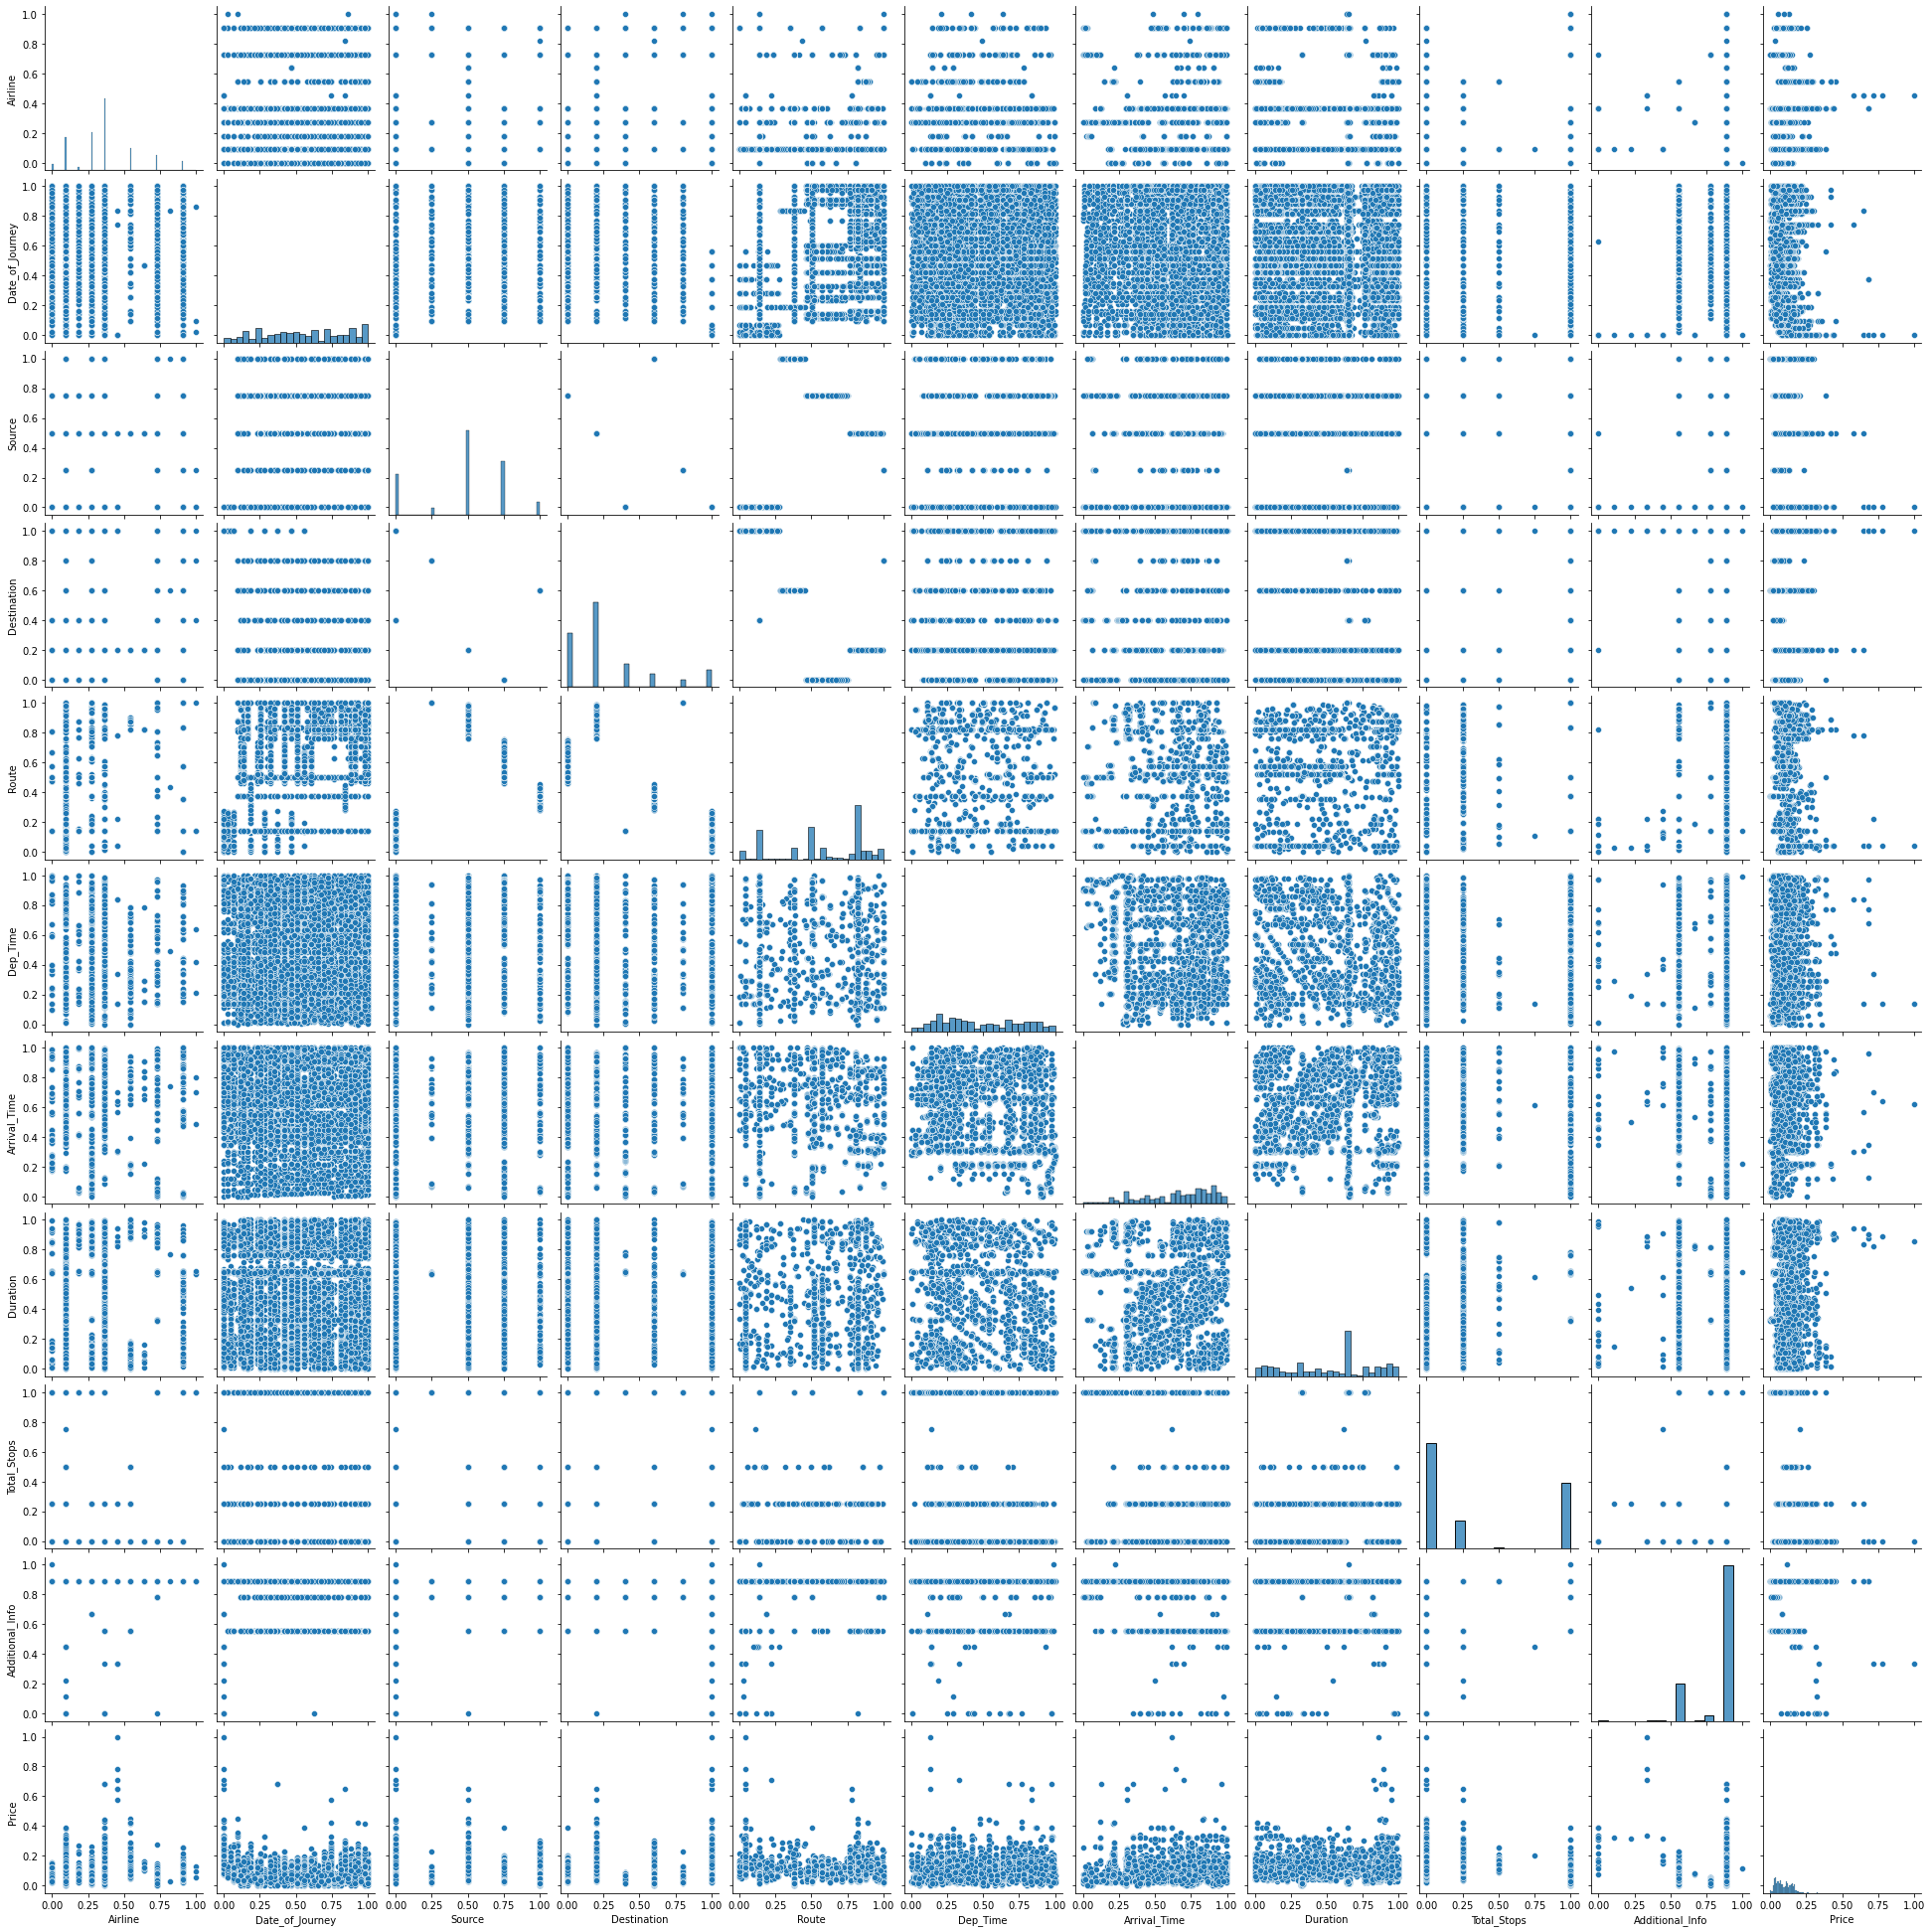

In [19]:
sn.pairplot(df)

## Pairplot With Our Target Variable

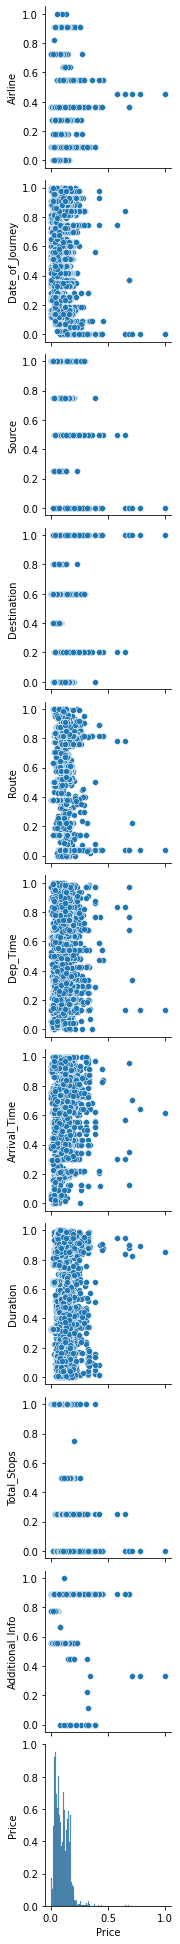

In [20]:
sn.pairplot(data=df,
            x_vars=['Price'],
            y_vars=df.columns)

## Heatmap

<AxesSubplot:>

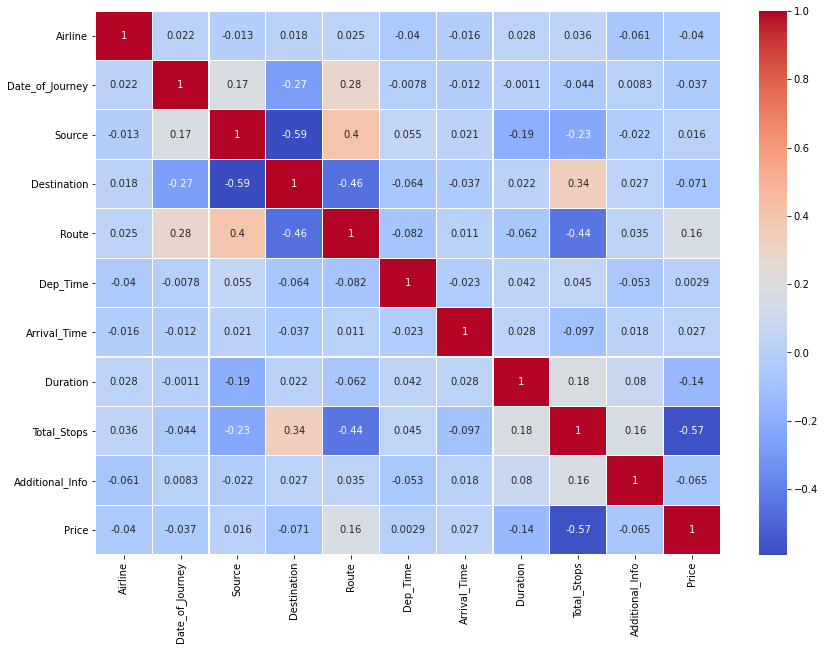

In [21]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Some Of the columns have some correlation but not that high so we leave it at that.                                             
Total_Stops Have high correlation with our Target Variable.

# Removing Outliers

In [22]:
from scipy.stats import zscore

In [23]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [24]:
df.shape

(10577, 11)

.99% data is lost which is ok

# Skewness Removal

In [25]:
df.skew()

Airline            0.731671
Date_of_Journey   -0.061745
Source            -0.439175
Destination        1.269331
Route             -0.511212
Dep_Time           0.193999
Arrival_Time      -0.608421
Duration          -0.216167
Total_Stops        0.618057
Additional_Info   -1.533439
Price              0.410987
dtype: float64

In [26]:
from scipy.stats import boxcox

### Airline

In [27]:
a=boxcox(df["Airline"]+1)[0]
pd.Series(a).skew()

0.009983589109186654

In [28]:
df["Airline"]=a

### Destination

In [29]:
a=boxcox(df["Destination"]+1)[0]
pd.Series(a).skew()

0.14142481197605725

### Additional_Info

In [30]:
a=np.log(df["Additional_Info"]+.1)
a.skew()

-1.5493729132286922

# Input Splitting

In [31]:
x=df.drop(["Price"],axis=1)

In [32]:
y=df["Price"]

# Finding The Best Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [34]:
#regress function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [35]:
LR=LinearRegression()
regress(LR,x,y)

R2: 40.753031289859834
CV Score: 40.24850181686334
Diffrence: 0.5045294729964951


In [36]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 75.16845541631223
CV Score: 84.42882029367937
Diffrence: 9.260364877367138


In [37]:
RDG=Ridge()
regress(RDG,x,y)

R2: 40.74710788329282
CV Score: 40.24881778843308
Diffrence: 0.4982900948597404


In [38]:
LSO=Lasso()
regress(LSO,x,y)

R2: -0.20020413140604543
CV Score: -0.09318279677430485
Diffrence: 0.10702133463174057


In [39]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 84.76150622293075
CV Score: 90.26567705554636
Diffrence: 5.504170832615614


In [40]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 64.6959345131882
CV Score: 73.20245313049368
Diffrence: 8.506518617305474


In [41]:
XGB=XGBRegressor()
regress(XGB,x,y)

R2: 88.19825665619427
CV Score: 92.39754410471043
Diffrence: 4.199287448516159


XGBRegressor is our best model

# Hyper Parameter Tuning

In [42]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [43]:
params = {  'max_depth':[2,4,6],
    'min_child_weight': [1,2,3],
    'eta':[.1,.2,.3],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3],
    'objective':['reg:squarederror','binary:logistic','multi:softmax']}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
gs = GridSearchCV(XGB, params, verbose = 1, cv=3, n_jobs = -1)

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_par

In [47]:
gs.best_params_

{'colsample_bytree': 1,
 'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 1}

# Checking Accuracy Score

In [48]:
XGB=XGBRegressor(colsample_bytree= 1,
 eta= 0.1,
 max_depth= 6,
 min_child_weight= 1,
 objective= 'reg:squarederror',
 subsample= 1)

In [49]:
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
XGB.score(X_test,Y_test)

0.869734587350277

In [51]:
y_test_pred=XGB.predict(X_test)

In [52]:
print(XGB.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [69]:
import joblib
joblib.dump(XGB,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\8_flightPrice\price.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\8_flightPrice\\price.pkl']